## 线性判别（LDA）降维

In [1]:
feature_dict={i:label for i,label in zip(range(4),
                                        ('sepal length in cm',
                                        'sepal width in cm',
                                        'petal length in cm',
                                        'petal width in cm'))}
import pandas as pd


In [4]:
df=pd.io.parsers.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None,
                         sep=',')
df.columns=[l for i,l in sorted(feature_dict.items())]+['class label']
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**将label准化成数据标签**

In [5]:
from sklearn.preprocessing import LabelEncoder

In [9]:
##提取特征数据和标签
X=df[['sepal length in cm','sepal width in cm','petal length in cm','petal length in cm','petal width in cm']].values
y=df['class label'].values
##制作标签
enc=LabelEncoder()
label_encoder=enc.fit(y)
y=label_encoder.transform(y)+1
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

**直接利用sklearn包中的LDA降维**

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [12]:
sklearn_lda=LDA(n_components=3)
X_lda_sklearn=sklearn_lda.fit_transform(X,y)

D:\cainiao\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


**主成分分析降维**

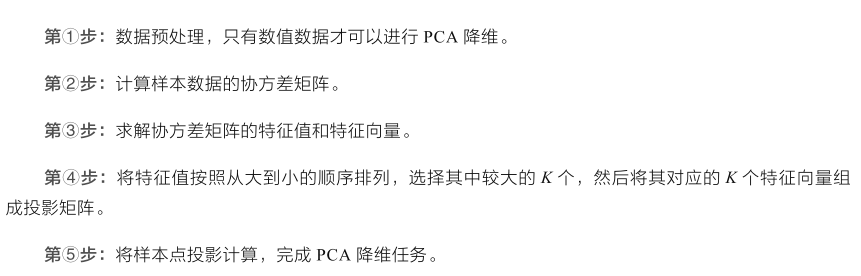

In [13]:
from sklearn import datasets


In [14]:
iris=datasets.load_iris()

In [22]:
df=pd.read_csv('E:/jupyter/iris.csv')
df.columns=['sepal_len','sepal_wid','petal_len','petal_wid','class ']
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [23]:
##把数据分成特征和标签
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

In [26]:
from matplotlib import pyplot as plt


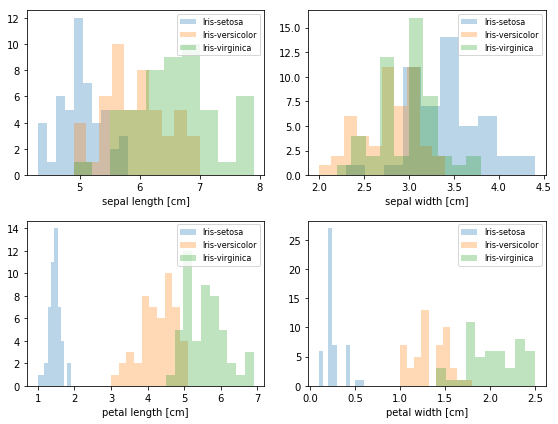

In [30]:
label_dict={1:'Iris-Setosa',
           2:'Iris-Versicolor',
           3:'Iris-Virgnica'}

feature_dict={0:'sepal length [cm]',
              1:'sepal width [cm]',
              2:'petal length [cm]', 
              3:'petal width [cm]'}
plt.figure(figsize=(8,6))
for cnt in range(4):
    plt.subplot(2,2,cnt+1)
    for lab in('Iris-setosa','Iris-versicolor','Iris-virginica'):
        plt.hist(X[y==lab,cnt],label=lab,bins=10,alpha=0.3)
    plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right',fancybox=True,fontsize=8)
plt.tight_layout()
plt.show()

In [31]:
X[y==lab,cnt]

array([2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1,
       2. , 2.4, 2.3, 1.8, 2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8,
       1.8, 1.8, 2.1, 1.6, 1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8,
       2.1, 2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [35]:
##数据标准化
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)
import numpy as np

In [36]:
##协方差矩阵
mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)
print('协方差矩阵\n%s' %cov_mat)

协方差矩阵
[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


In [39]:
np.cov(X_std.T)

array([[ 1.00675676, -0.10448539,  0.87716999,  0.82249094],
       [-0.10448539,  1.00675676, -0.41802325, -0.35310295],
       [ 0.87716999, -0.41802325,  1.00675676,  0.96881642],
       [ 0.82249094, -0.35310295,  0.96881642,  1.00675676]])

In [43]:
##特征值和特征向量
cov_mat=np.cov(X_std.T)
eig_vals,eig_vecs=np.linalg.eig(cov_mat)
print('特征值\n%s' %eig_vals)
print('\n特征向量\n%s'%eig_vecs)

特征值
[2.92442837 0.93215233 0.14946373 0.02098259]

特征向量
[[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]


In [45]:
##计算贡献率
tot=sum(eig_vals)
var_exp=[(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
print(var_exp)
cum_var_exp=np.cumsum(var_exp)
cum_var_exp

[72.62003332692029, 23.147406858644153, 3.711515564584534, 0.5210442498510144]


array([ 72.62003333,  95.76744019,  99.47895575, 100.        ])

**前两个特征值的累计贡献率已经超过95%，所以降到二维**

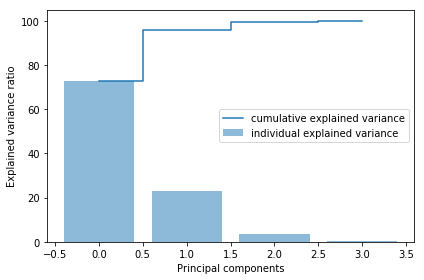

In [46]:
plt.figure(figsize=(6,4))
plt.bar(range(4),var_exp,alpha=0.5,align='center',label='individual explained variance')
plt.step(range(4),cum_var_exp,where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [48]:
##完成PCA降维。接下来把特征向量组合起来完成降维工作：
eig_pairs=[(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
print(eig_pairs)
print('---------')

##特征值排序
eig_pairs.sort(key=lambda x:x[0],reverse=True)
##打印
print('特征值排序结果：')
for i in eig_pairs:
    print(i[0])

[(2.9244283691111126, array([ 0.52308496, -0.25956935,  0.58184289,  0.56609604])), (0.9321523302535072, array([-0.36956962, -0.92681168, -0.01912775, -0.06381646])), (0.14946373489813383, array([-0.72154279,  0.2411952 ,  0.13962963,  0.63380158])), (0.020982592764270565, array([ 0.26301409, -0.12437342, -0.80099722,  0.52321917]))]
---------
特征值排序结果：
2.9244283691111126
0.9321523302535072
0.14946373489813383
0.020982592764270565


**降维**

In [49]:
matrix_w=np.hstack((eig_pairs[0][1].reshape(4,1),eig_pairs[1][1].reshape(4,1)))
Y=X_std.dot(matrix_w)

In [50]:
matrix_w

array([[ 0.52308496, -0.36956962],
       [-0.25956935, -0.92681168],
       [ 0.58184289, -0.01912775],
       [ 0.56609604, -0.06381646]])

In [52]:
Y

array([[-2.10795032,  0.64427554],
       [-2.38797131,  0.30583307],
       [-2.32487909,  0.56292316],
       [-2.40508635, -0.687591  ],
       [-2.08320351, -1.53025171],
       [-2.4636848 , -0.08795413],
       [-2.25174963, -0.25964365],
       [-2.3645813 ,  1.08255676],
       [-2.20946338,  0.43707676],
       [-2.17862017, -1.08221046],
       [-2.34525657, -0.17122946],
       [-2.24590315,  0.6974389 ],
       [-2.66214582,  0.92447316],
       [-2.2050227 , -1.90150522],
       [-2.25993023, -2.73492274],
       [-2.21591283, -1.52588897],
       [-2.20705382, -0.52623535],
       [-1.9077081 , -1.4415791 ],
       [-2.35411558, -1.17088308],
       [-1.93202643, -0.44083479],
       [-2.21942518, -0.96477499],
       [-2.79116421, -0.50421849],
       [-1.83814105, -0.11729122],
       [-2.24572458, -0.17450151],
       [-1.97825353,  0.59734172],
       [-2.06935091, -0.27755619],
       [-2.18514506, -0.56366755],
       [-2.15824269, -0.34805785],
       [-2.28843932,

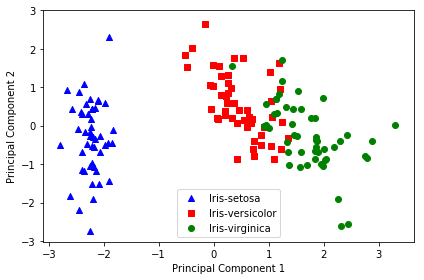

In [54]:
##降维后的可视化
plt.figure(figsize=(6,4))
for lab,col,marker in zip(('Iris-setosa','Iris-versicolor','Iris-virginica'),('blue','red','green'),('^','s','o')):
    plt.scatter(Y[y==lab,0],
               Y[y==lab,1],
               marker=marker,
               label=lab,c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

In [55]:
Y[y==lab,0]

array([1.8408037 , 1.13831104, 2.19615974, 1.42613827, 1.8575403 ,
       2.74511173, 0.34010583, 2.29180093, 1.98618025, 2.26382116,
       1.35591821, 1.58471851, 1.87342402, 1.23656166, 1.45128483,
       1.58276283, 1.45956552, 2.43560434, 3.29752602, 1.23377366,
       2.03218282, 0.95980311, 2.88717988, 1.31405636, 1.69619746,
       1.94868773, 1.1574572 , 1.007133  , 1.7733922 , 1.85327106,
       2.4234788 , 2.31353522, 1.84800289, 1.09649923, 1.1812503 ,
       2.79178861, 1.57340399, 1.33614369, 0.91061354, 1.84350913,
       2.00701161, 1.89319854, 1.13831104, 2.03519535, 1.99464025,
       1.85977129, 1.54200377, 1.50925493, 1.3690965 , 0.94680339])

In [56]:
Y[y==lab,1]

array([-0.86943848,  0.70171953, -0.54916658,  0.05187679, -0.28797217,
       -0.78056359,  1.5568955 , -0.40328242,  0.72876171, -1.91685818,
       -0.69255356,  0.43102351, -0.41054652,  1.16818977,  0.4451459 ,
       -0.67521526, -0.25105642, -2.55096977,  0.01266612,  1.71954411,
       -0.90334021,  0.57047585, -0.38895776,  0.48854962, -1.01153249,
       -0.99881497,  0.31987373, -0.06550254,  0.19641059, -0.55077372,
       -0.2397454 , -2.62038074,  0.18799967,  0.29708201,  0.81858241,
       -0.83668445, -1.07118383, -0.420823  , -0.01965942, -0.66872729,
       -0.60663655, -0.68227708,  0.70171953, -0.86076914, -1.04517619,
       -0.37934387,  0.90808604, -0.26460621, -1.01583909,  0.02182097])

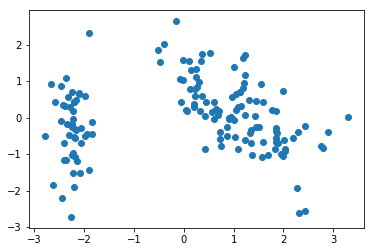

In [59]:
plt.scatter(Y[:,0],Y[:,1])

In [58]:
Y[:,0]

array([-2.10795032,  0.64427554])